In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movie = pd.read_csv("./data/IMDB-Movie-Data.csv")

In [4]:
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# 我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？

In [7]:
movie["Rating"].mean()

6.723200000000003

In [9]:
np.unique(movie["Director"]).shape[0]

644

# 对于这一组电影数据，如果我们想Rating，Runtime (Minutes)的分布情况，应该如何呈现数据？

<AxesSubplot:ylabel='Frequency'>

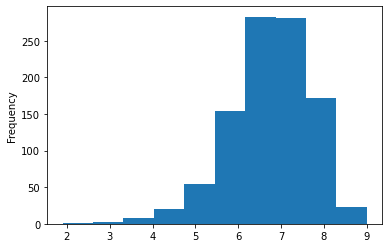

In [15]:
# Rating 分布

movie["Rating"].plot(kind="hist")

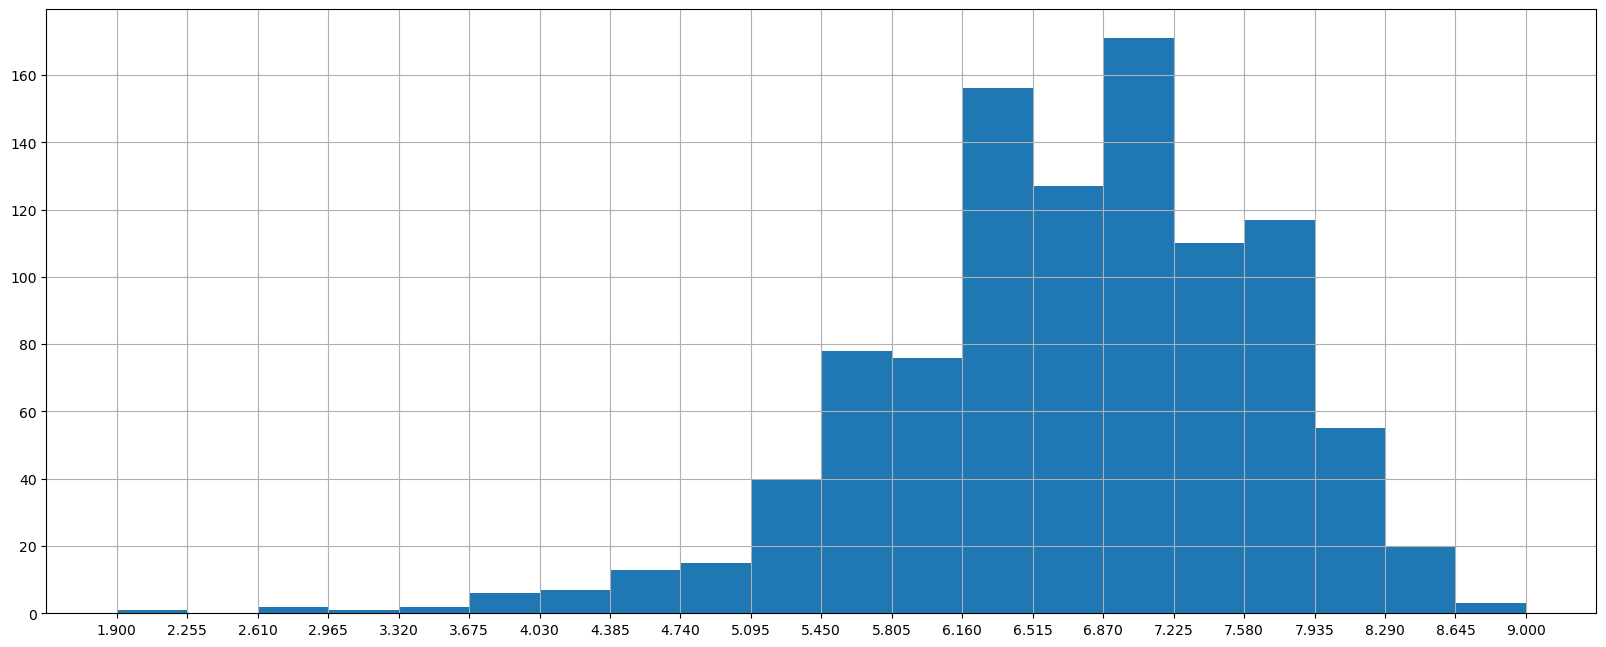

In [22]:
# 1.创建画布
plt.figure(figsize=(20, 8), dpi=100)

# 2.绘制图像
plt.hist(movie["Rating"].values, bins=20)

# 2.1添加刻度
max_ = movie["Rating"].max()
min_ = movie["Rating"].min()

t1 = np.linspace(min_, max_, num=21)

plt.xticks(t1)

#2.2添加网格
plt.grid()

# 显示图像
plt.show()

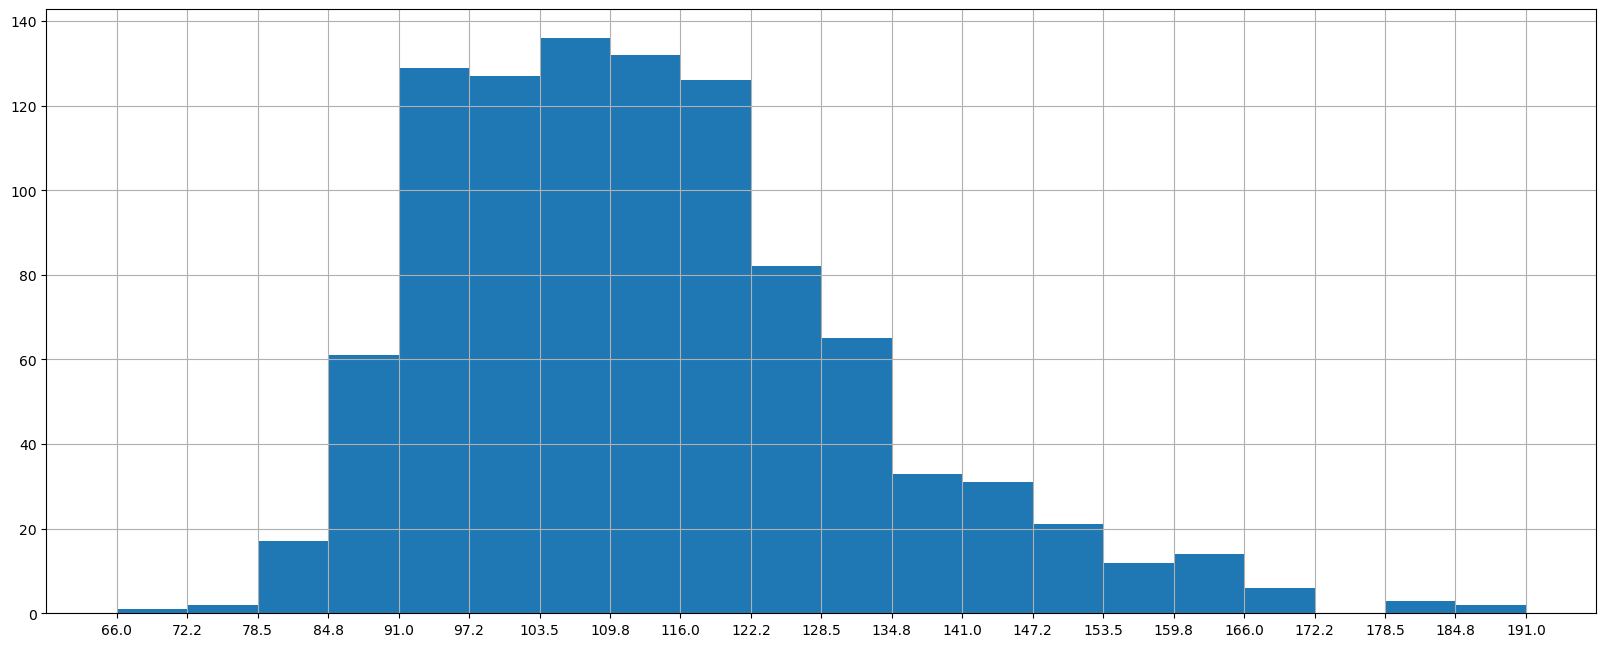

In [23]:
# 1.创建画布
plt.figure(figsize=(20, 8), dpi=100)

# 2.绘制图像
plt.hist(movie["Runtime (Minutes)"].values, bins=20)

# 2.1添加刻度
max_ = movie["Runtime (Minutes)"].max()
min_ = movie["Runtime (Minutes)"].min()

t1 = np.linspace(min_, max_, num=21)

plt.xticks(t1)

#2.2添加网格
plt.grid()

# 显示图像
plt.show()

# 对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

In [28]:
# movie["Genre"]
temp_list = [i.split(",") for i in movie["Genre"]]

In [30]:
temp_list

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Crime', 'Drama', 'Horror'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Horror', 'Thriller'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure

In [57]:
genre_list = np.unique([i for j in temp_list for i in j])
genre_list

array(['-', 'A', 'B', 'C', 'D', 'F', 'H', 'M', 'R', 'S', 'T', 'W', 'a',
       'c', 'd', 'e', 'g', 'h', 'i', 'l', 'm', 'n', 'o', 'p', 'r', 's',
       't', 'u', 'v', 'y'], dtype='<U1')

In [36]:
zeros = np.zeros([movie.shape[0], genre_list.shape[0]])

In [48]:
temp_movie = pd.DataFrame(zeros, columns=genre_list)

In [49]:
temp_movie.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
for i in range(1000):
    temp_movie.ix[i, temp_list[i]] = 1

AttributeError: 'DataFrame' object has no attribute 'ix'

In [51]:
temp_movie.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
temp_movie.sum()

Action       0.0
Adventure    0.0
Animation    0.0
Biography    0.0
Comedy       0.0
Crime        0.0
Drama        0.0
Family       0.0
Fantasy      0.0
History      0.0
Horror       0.0
Music        0.0
Musical      0.0
Mystery      0.0
Romance      0.0
Sci-Fi       0.0
Sport        0.0
Thriller     0.0
War          0.0
Western      0.0
dtype: float64

In [55]:
genre = temp_movie.sum().sort_values(ascending=False)
genre

Western      0.0
War          0.0
Adventure    0.0
Animation    0.0
Biography    0.0
Comedy       0.0
Crime        0.0
Drama        0.0
Family       0.0
Fantasy      0.0
History      0.0
Horror       0.0
Music        0.0
Musical      0.0
Mystery      0.0
Romance      0.0
Sci-Fi       0.0
Sport        0.0
Thriller     0.0
Action       0.0
dtype: float64

<AxesSubplot:>

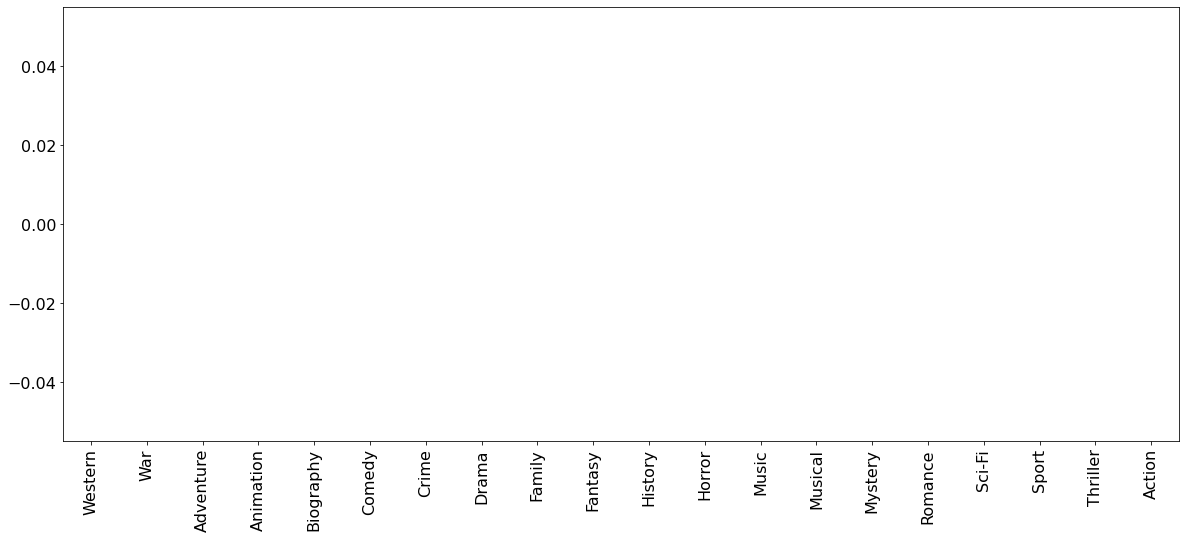

In [56]:
genre.plot(kind="bar", colormap="cool", figsize=(20,8),fontsize=16)